# PCA (Principal Component Analysis) wine-datasetilla

https://www.kaggle.com/datasets/harrywang/wine-dataset-for-clustering

 1. Tuokaa data dataframena
 2. skaalatkaa
 3. analysoikaa, montako komponenttia on tarpeen selittää yli 90%
 4. Tehkää PCA valitulla komponenttimäärällä
 5. Piirtäkää heatmap siitä, mitkä featuret selittää kutakin komponenttia (loadings)

Yritetään PCA:n avulla ymmärtää dataa enemmän ja että mitkä featuret vaikuttaa. Onnistuuko datasta dimensioiden vähennys?

In [ ]:
import kagglehub
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
#path = kagglehub.dataset_download("harrywang/wine-dataset-for-clustering")

#print("Path to dataset files:", path)

100%|██████████| 4.36k/4.36k [00:00<00:00, 2.24MB/s]

Extracting files...
Path to dataset files: C:\Users\emilh\.cache\kagglehub\datasets\harrywang\wine-dataset-for-clustering\versions\1


Tuodaan data df

In [7]:
wine_data = pd.read_csv('./datasets/t2/wine-clustering.csv')
wine_data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Skaalataan data

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(wine_data)

Analysoidaan montako komponenttia on tarpeen 90% selitysasteelle

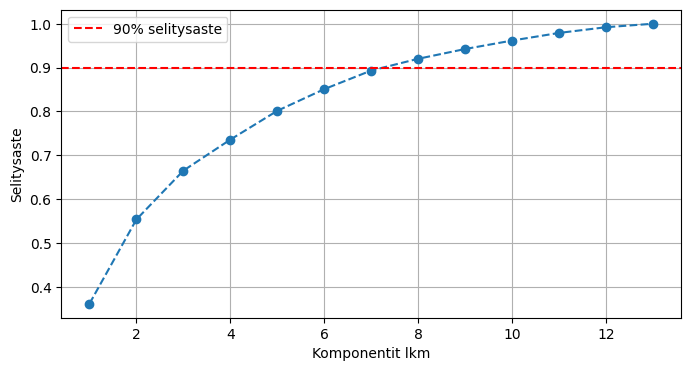

In [19]:
from sklearn.decomposition import PCA
import numpy as np

# Ilman rajoitusta
pca = PCA()
pca.fit(X_scaled)

# Analyysi
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.axhline(y=0.9, color='r', linestyle='--', label='90% selitysaste')
plt.xlabel('Komponentit lkm')
plt.ylabel('Selitysaste')
plt.legend()
plt.grid()
plt.show()


Tehdään PCA ~8 komponentilla

In [18]:
components = 8

pca = PCA(n_components=components)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(data=X_pca, columns=[f'{i+1}' for i in range(components)])
pca_df.head()


,1,2,3,4,5,6,7,8
0,3.316751,1.443463,-0.165739,-0.215631,0.693043,0.223880,0.596427,-0.065139
1,2.209465,-0.333393,-2.026457,-0.291358,-0.257655,0.927120,0.053776,-1.024416
2,2.516740,1.031151,0.982819,0.724902,-0.251033,-0.549276,0.424205,0.344216
3,3.757066,2.756372,-0.176192,0.567983,-0.311842,-0.114431,-0.383337,-0.643593
4,1.008908,0.869831,2.026688,-0.409766,0.298458,0.406520,0.444074,-0.416700


Heatmap

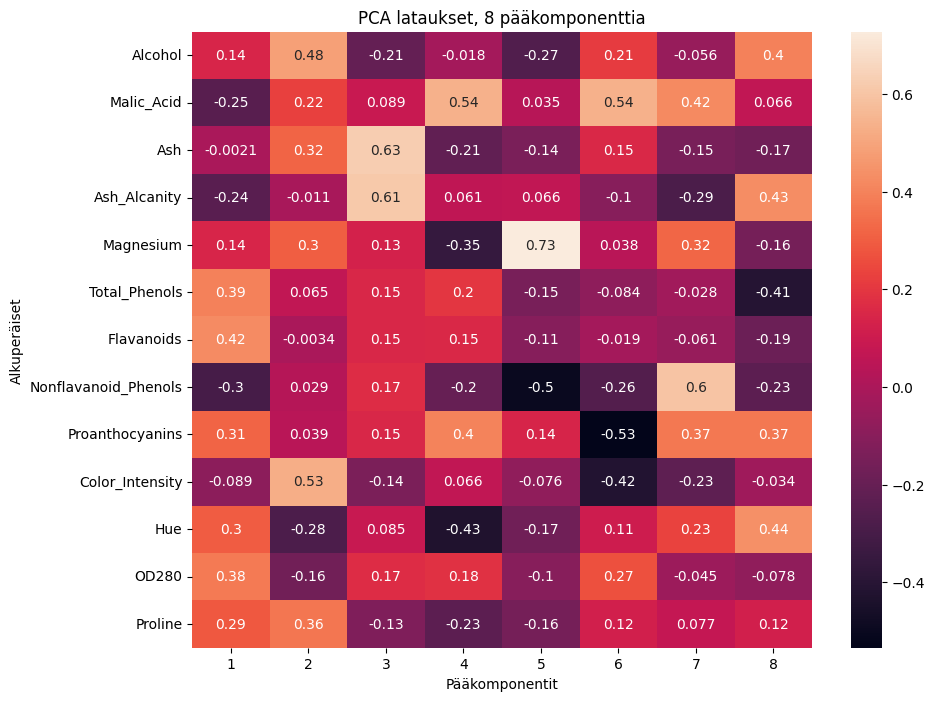

In [30]:
loadings = pca.components_.T[:, :components]  # https://numpy.org/doc/stable/reference/generated/numpy.ndarray.T.html & pääkomponentit
loadings_df = pd.DataFrame(data=loadings, index=wine_data.columns, columns=[f'{i+1}' for i in range(components)])

plt.figure(figsize=(10, 8))
sns.heatmap(loadings_df, annot=True)
plt.title('PCA lataukset, 8 pääkomponenttia')
plt.xlabel('Pääkomponentit')
plt.ylabel('Alkuperäiset')
plt.show()

"Yritetään PCA:n avulla ymmärtää dataa enemmän ja että mitkä featuret vaikuttaa. Onnistuuko datasta dimensioiden vähennys?"

- Onnistui dimensioiden vähennys. 
- Merkittävämpiä ominaisuuksia on flavanoids, total_phenols, proline, malic_adic ja color_intensity. Etenkin flavanoids, total_phenols ja proline dominoivat PC1:stä